**Temperature Forecast Project using ML**
**Project Description**


This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.



Attribute Information:
For more information, read [Cho et al, 2020].


1. station - used weather station number: 1 to 25


2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')


3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6


4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9


5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5


6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100


7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5


8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6


9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9


10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4


11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97


12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97


13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98


14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97


15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7


16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6


17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8


18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7


19. lat - Latitude (Â°): 37.456 to 37.645


20. lon - Longitude (Â°): 126.826 to 127.135


21. DEM - Elevation (m): 12.4 to 212.3


22. Slope - Slope (Â°): 0.1 to 5.2


23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9


24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9


25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv


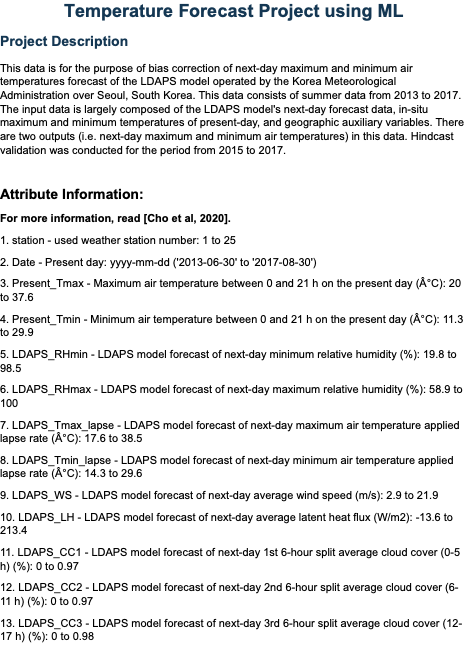

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [62]:
df= pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [63]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# Exploratory Data Analysis

In [65]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


there are outliers and null values in dataset

In [66]:
from sklearn.impute import KNNImputer

In [67]:
# Handle null values by knn imputer
knnimp = KNNImputer(n_neighbors=3)
for i in df.columns:
    if df[i].dtypes!='object':
        df[i]= knnimp.fit_transform(df[i].values.reshape(-1,1))
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [68]:
df.isna().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [69]:
df.drop('Date', axis=1, inplace=True)

In [70]:
df.isna().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


# Checking for outliers

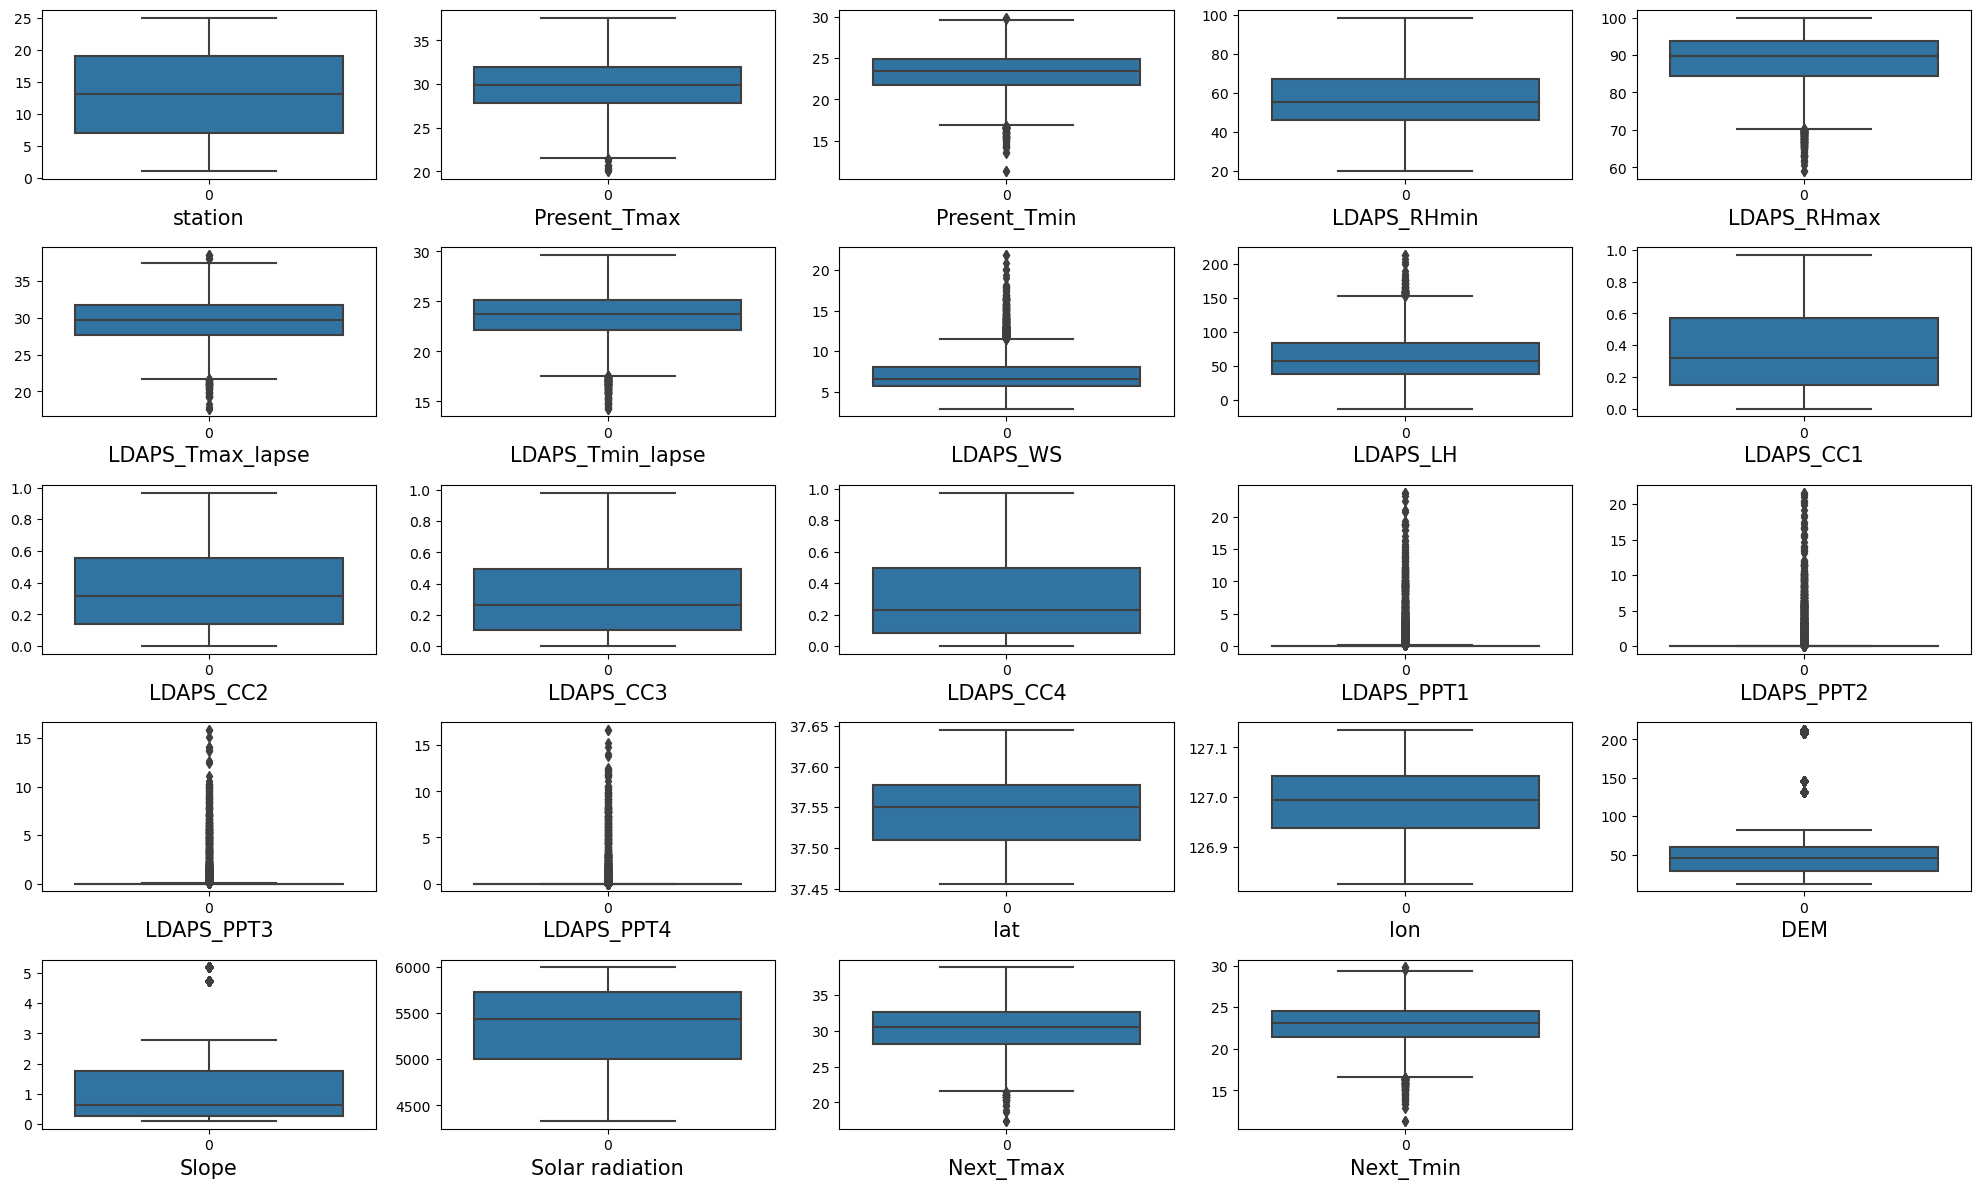

In [72]:
plt.figure(figsize=(20,12))
plotnumber=1
for col in df.columns:
    if plotnumber<=24:
        ax= plt.subplot(5,5, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [73]:
from scipy.stats import zscore
z_score= zscore(df)
abs_z_score = np.abs(z_score)  #Apply formula to get scalled data

filtering_entry= (abs_z_score<3).all(axis=1) # we want 3 scaler standard so we consider 3

df= df[filtering_entry]

df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,...,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000
mean,13.035828,29.937593,23.310952,55.611584,88.101025,29.883791,23.651018,6.864507,61.968514,0.345529,...,0.210588,0.105183,0.088069,37.543921,126.990820,61.054583,1.237473,5340.908071,30.563660,23.084466
std,7.199184,2.854338,2.306769,13.824432,6.910302,2.735174,2.215289,1.838526,33.238068,0.250532,...,0.741144,0.396077,0.361534,0.049965,0.079677,53.495688,1.350592,420.107515,2.932898,2.353359
min,1.000000,21.200000,16.100000,19.794666,66.989464,21.195428,16.558304,2.882580,-8.569043,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4371.684570,21.100000,15.500000
25%,7.000000,28.100000,21.700000,45.720074,83.955292,28.026182,22.225706,5.626578,36.711938,0.138482,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5017.061523,28.600000,21.500000
50%,13.000000,30.000000,23.400000,54.344843,89.190006,29.900551,23.837372,6.459551,57.166298,0.297998,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5428.761230,30.700000,23.200000
75%,19.000000,32.100000,24.900000,65.037983,93.409286,31.805765,25.194450,7.729514,84.150760,0.500953,...,0.006291,0.002308,0.000000,37.577600,127.042000,59.832400,1.767800,5716.302246,32.700000,24.700000
max,25.000000,37.600000,29.900000,96.169815,99.999008,38.140534,29.619342,13.589191,161.661149,0.967277,...,5.743190,3.720154,3.789353,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


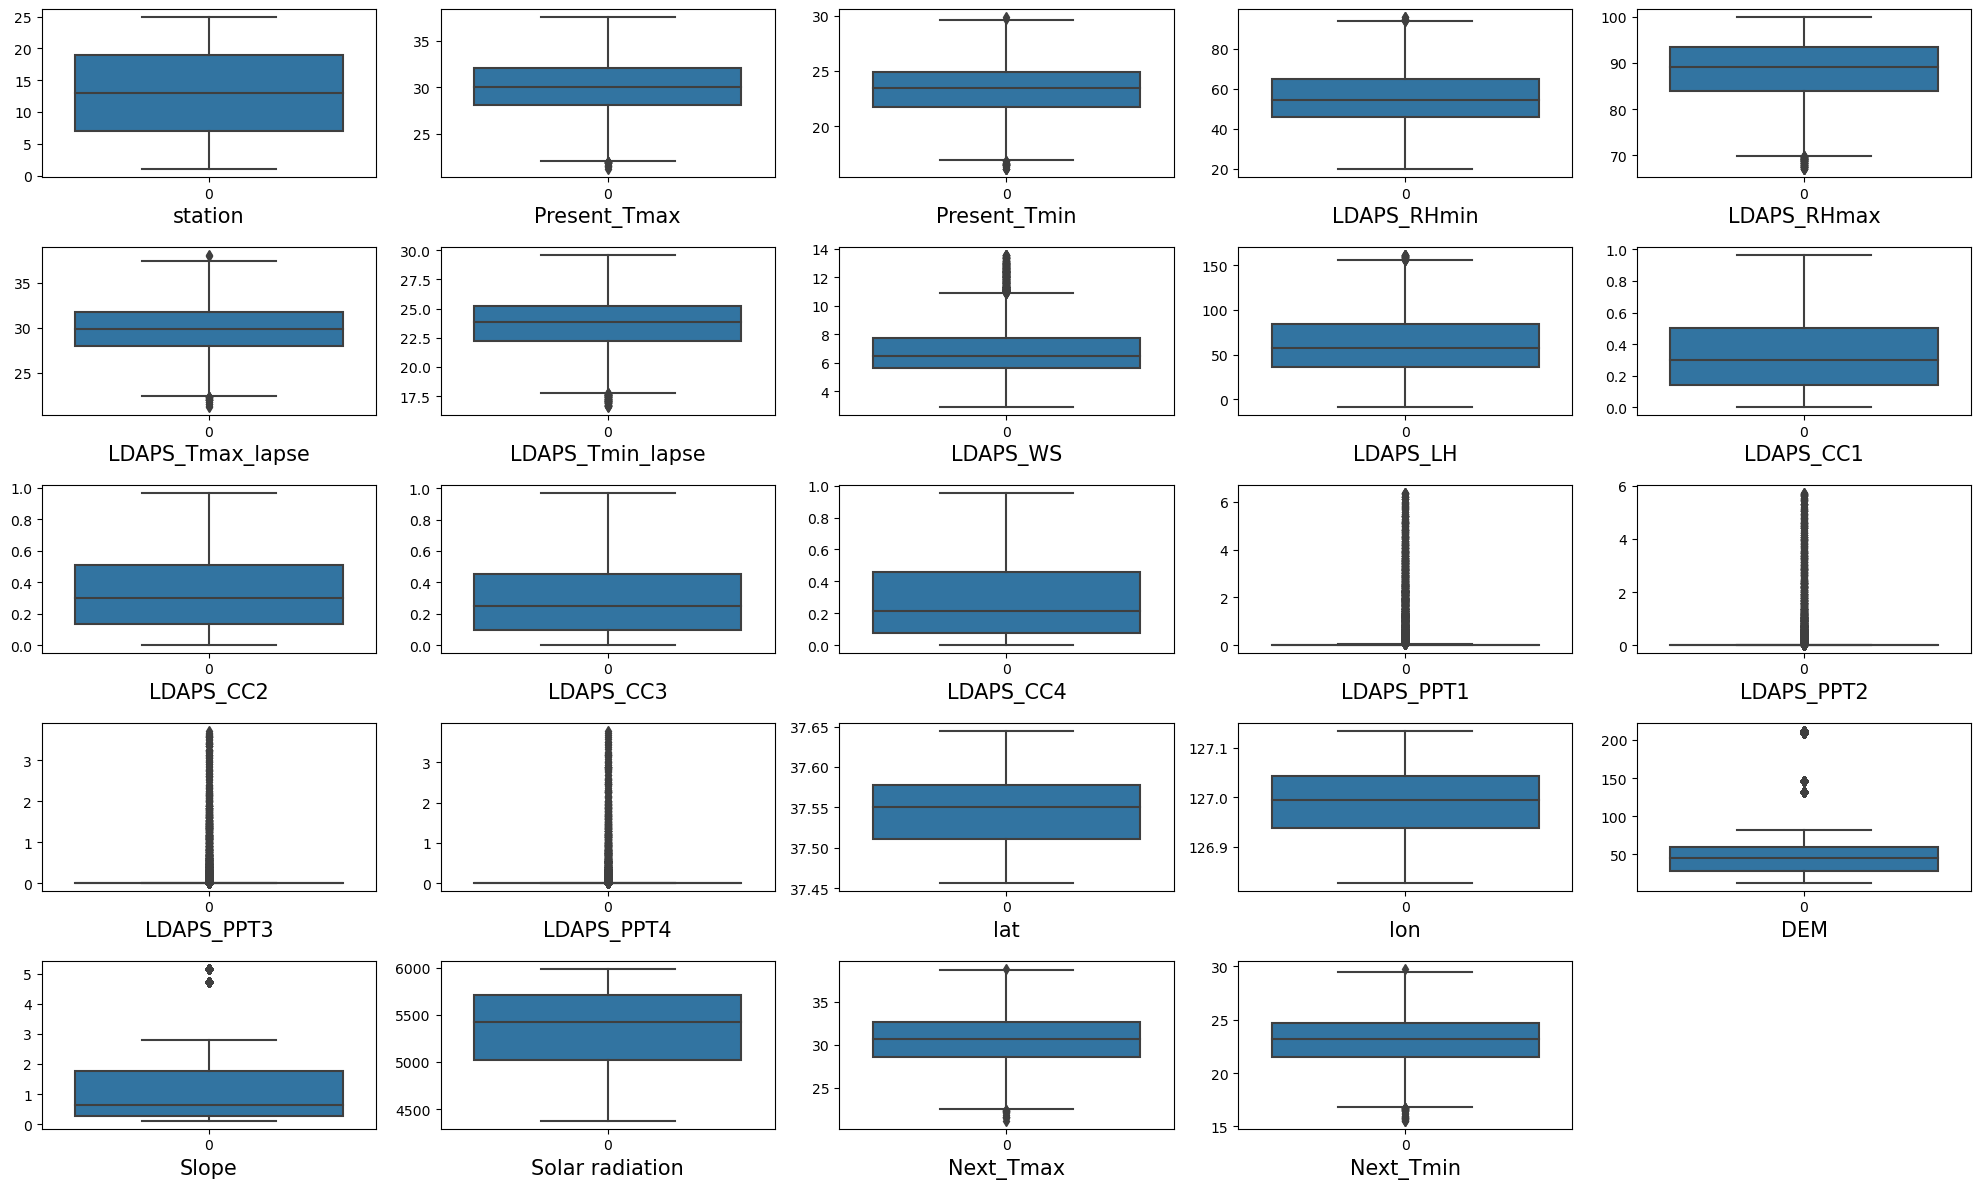

In [74]:
plt.figure(figsize=(20,12))
plotnumber=1
for col in df.columns:
    if plotnumber<=24:
        ax= plt.subplot(5,5, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

Data looks normal now

In [75]:
cor= df.corr()
cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.109476,0.132092,-0.067901,-0.172809,0.065989,0.103741,0.021473,-0.135588,0.009486,...,-0.023441,0.003984,0.014409,-0.240428,-0.122474,-0.257504,-0.095541,-0.029658,0.106116,0.129180
Present_Tmax,0.109476,1.000000,0.612869,-0.151799,-0.295184,0.534696,0.609642,-0.104222,0.129469,-0.286673,...,-0.037113,-0.012032,-0.038329,-0.050398,0.011214,-0.168532,-0.091561,-0.064734,0.586403,0.616843
Present_Tmin,0.132092,0.612869,1.000000,0.150633,-0.038516,0.434144,0.752887,0.019815,-0.003840,0.090553,...,0.087087,0.041499,-0.047673,-0.071014,-0.043494,-0.239765,-0.137911,0.011582,0.446660,0.785261
LDAPS_RHmin,-0.067901,-0.151799,0.150633,1.000000,0.552690,-0.555284,0.131633,0.240804,-0.037860,0.575977,...,0.378324,0.261354,0.185773,0.088642,-0.094266,0.095774,0.119976,0.251406,-0.428028,0.133571
LDAPS_RHmax,-0.172809,-0.295184,-0.038516,0.552690,1.000000,-0.386650,-0.140126,0.097805,0.271313,0.411650,...,0.227141,0.120047,0.105881,0.198806,0.016957,0.172592,0.218423,0.154352,-0.300434,-0.096533
LDAPS_Tmax_lapse,0.065989,0.534696,0.434144,-0.555284,-0.386650,1.000000,0.620262,-0.232181,0.037524,-0.417050,...,-0.242213,-0.143261,-0.160780,-0.036545,0.103314,-0.163030,-0.149906,0.012626,0.805676,0.547000
LDAPS_Tmin_lapse,0.103741,0.609642,0.752887,0.131633,-0.140126,0.620262,1.000000,-0.052768,-0.134505,0.038241,...,0.008682,0.011985,-0.080987,-0.088591,-0.028678,-0.177581,-0.173000,0.107649,0.538722,0.867095
LDAPS_WS,0.021473,-0.104222,0.019815,0.240804,0.097805,-0.232181,-0.052768,1.000000,-0.046063,0.262525,...,0.118174,0.128641,0.197393,-0.014222,-0.075586,0.153256,0.120189,0.134556,-0.275316,-0.012735
LDAPS_LH,-0.135588,0.129469,-0.003840,-0.037860,0.271313,0.037524,-0.134505,-0.046063,1.000000,-0.144830,...,-0.068520,0.010293,0.038315,0.122850,0.021891,0.064055,0.097418,-0.036532,0.172888,-0.045762
LDAPS_CC1,0.009486,-0.286673,0.090553,0.575977,0.411650,-0.417050,0.038241,0.262525,-0.144830,1.000000,...,0.394688,0.194218,0.196659,-0.006864,-0.013743,-0.026628,-0.033004,0.242596,-0.447965,0.009312


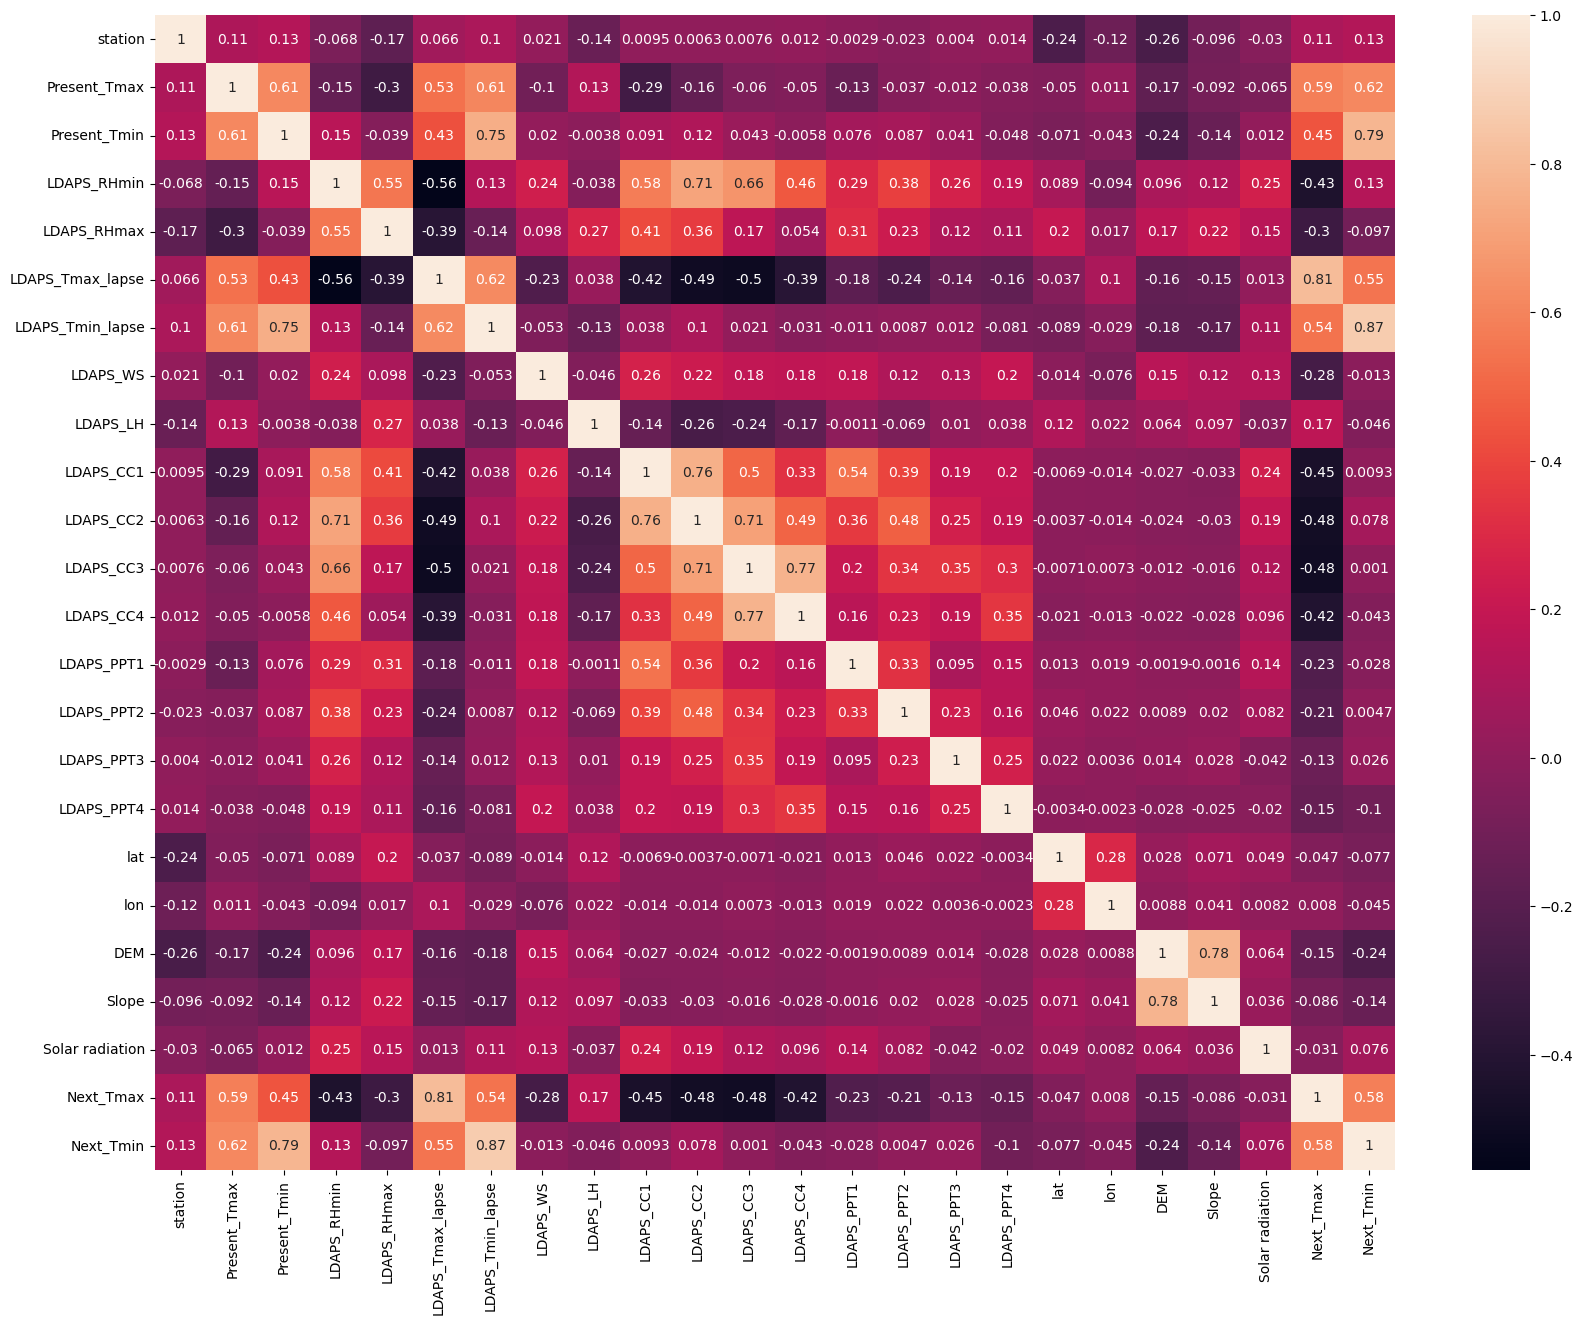

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.yticks(rotation=0);
plt.show()

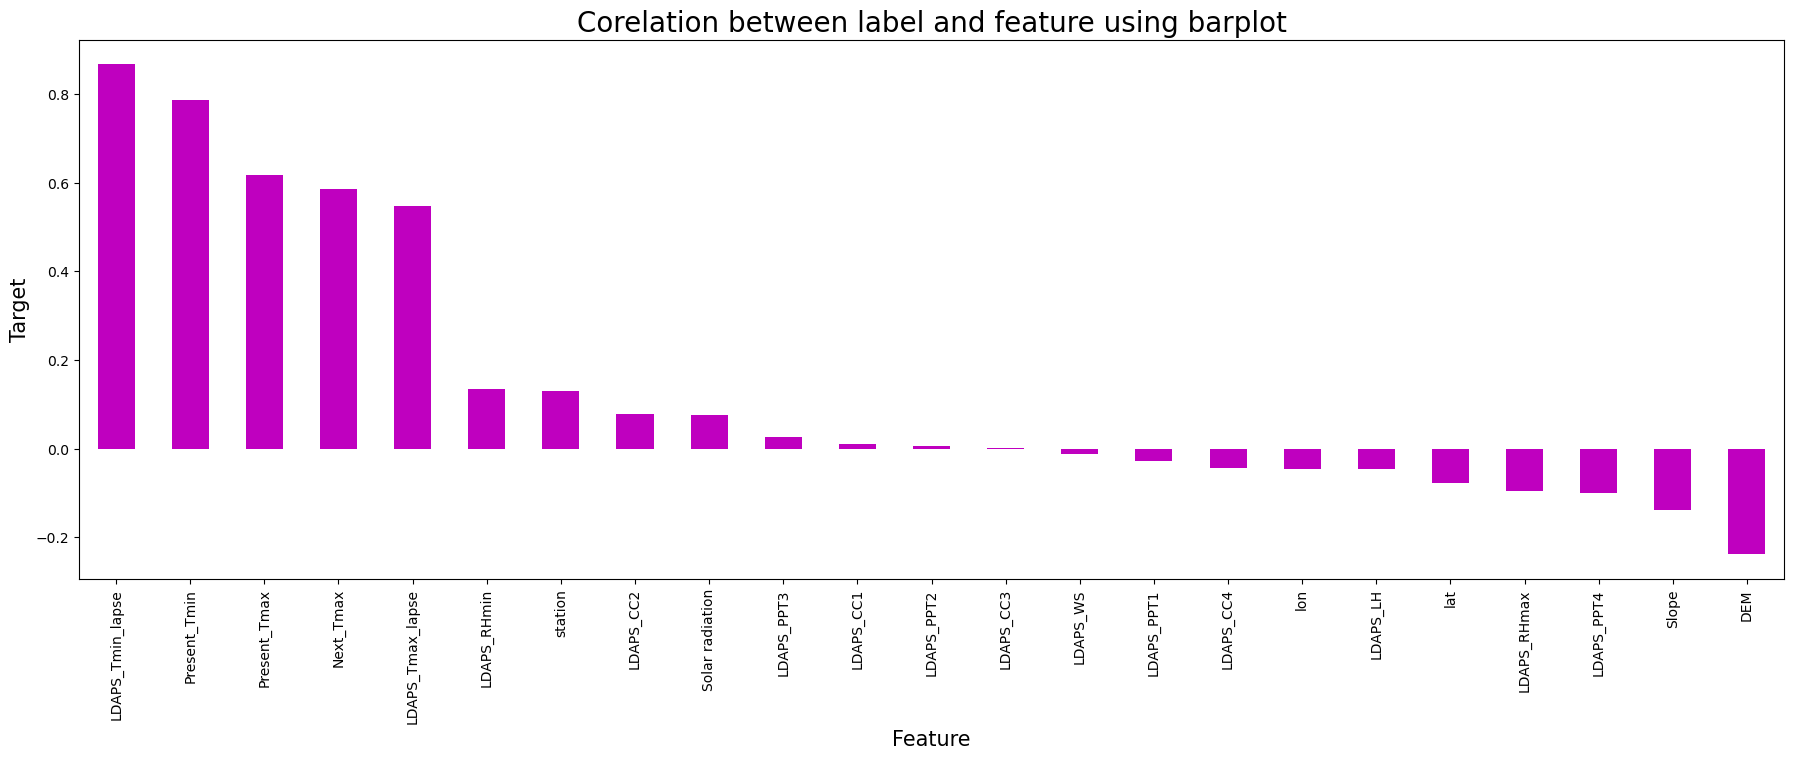

In [77]:
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Corelation between label and feature using barplot", fontsize=20)
plt.show()

In [78]:
cor['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.867095
Present_Tmin        0.785261
Present_Tmax        0.616843
Next_Tmax           0.584859
LDAPS_Tmax_lapse    0.547000
LDAPS_RHmin         0.133571
station             0.129180
LDAPS_CC2           0.078341
Solar radiation     0.075863
LDAPS_PPT3          0.025644
LDAPS_CC1           0.009312
LDAPS_PPT2          0.004712
LDAPS_CC3           0.001017
LDAPS_WS           -0.012735
LDAPS_PPT1         -0.027855
LDAPS_CC4          -0.043317
lon                -0.045154
LDAPS_LH           -0.045762
lat                -0.077030
LDAPS_RHmax        -0.096533
LDAPS_PPT4         -0.100543
Slope              -0.138353
DEM                -0.238453
Name: Next_Tmin, dtype: float64

**Separating label and features**

In [79]:
x= df.drop('Next_Tmin', axis=1)
y= df["Next_Tmin"]

**Feature scaling using Standard Scalarization**

In [80]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-1.671954,-0.433615,-0.828471,0.191277,0.436386,-0.661684,-0.290765,-0.024815,0.225159,-0.445412,...,-0.346539,-0.28416,-0.265581,-0.243617,1.214518,0.002256,2.828104,1.145897,1.552067,-0.499085
1,-1.533039,0.687567,-0.741763,-0.242211,0.362340,-0.012103,0.173349,-0.637849,-0.301816,-0.479100,...,-0.346539,-0.28416,-0.265581,-0.243617,1.214518,0.516874,-0.304573,-0.535636,1.257875,-0.021707
2,-1.394124,0.582457,-0.004748,-0.500679,-0.597331,0.075869,0.412895,-0.395064,-1.245514,-0.543626,...,-0.346539,-0.28416,-0.265581,-0.243617,0.674104,0.843217,-0.518730,-0.719273,1.244171,0.182884
3,-1.255209,0.722604,0.038606,0.190127,1.213156,-0.065508,-0.146647,-0.660608,0.113090,-0.515570,...,-0.346539,-0.28416,-0.265581,-0.243617,2.023139,0.391357,-0.286746,0.960631,1.228481,0.387474
4,-1.116295,0.512383,-0.611702,0.040693,0.297274,-0.281486,-0.074279,-0.614397,1.383966,-0.774897,...,-0.346539,-0.28416,-0.265581,-0.243617,0.135691,1.809694,-0.486366,-0.542004,1.234641,0.216982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,1.106341,-2.395683,-2.389208,-2.236969,-1.424012,-0.757262,-2.414309,-0.142110,-1.575249,-1.168108,...,-0.346539,-0.28416,-0.265581,-0.243617,0.135691,0.617287,-0.649755,-0.492689,-2.106479,-1.010562
6890,1.245255,-2.605905,-2.562623,-1.845904,-0.638370,-1.162309,-2.635053,-0.596404,0.607125,-1.113984,...,-0.346539,-0.28416,-0.265581,-0.243617,-0.674931,1.194663,-0.730725,-0.817681,-2.140332,-0.874168
6891,1.384170,-2.325609,-2.692685,-2.088503,-1.335953,-1.291313,-2.200929,-0.389247,0.303583,-1.259392,...,-0.346539,-0.28416,-0.265581,-0.243617,-0.134517,-1.252910,-0.849980,-0.801243,-2.136737,-0.771873
6892,1.523085,-2.325609,-2.432562,-2.283872,-1.563873,-1.050685,-2.219962,-0.174983,-0.443110,-1.236082,...,-0.346539,-0.28416,-0.265581,-0.243617,-0.404724,-1.026980,-0.818050,-0.751705,-2.148498,-0.669577


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.238422,station
1,2.775095,Present_Tmax
2,3.007400,Present_Tmin
3,5.923800,LDAPS_RHmin
4,2.216499,LDAPS_RHmax
5,8.051932,LDAPS_Tmax_lapse
6,6.754510,LDAPS_Tmin_lapse
7,1.242177,LDAPS_WS
8,1.551375,LDAPS_LH
9,3.544389,LDAPS_CC1


In [83]:
y.value_counts()


Next_Tmin
23.5    150
24.0    147
23.4    142
23.2    137
23.8    136
       ... 
29.1      1
28.2      1
29.0      1
16.3      1
16.2      1
Name: count, Length: 138, dtype: int64

# Model Building

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [85]:
#Finding the best Random State
MaxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train, y_train)
    pred= lr.predict(x_test)
    acc= r2_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu= acc
        maxRs=i
print("Maximum r2 score is ", MaxAccu, "On random state", maxRs)

Maximum r2 score is  0.8490176669964331 On random state 194


In [86]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=maxRs)


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

**Linear Regression**

In [88]:
lr= LinearRegression()
lr.fit(x_train, y_train)
pred_lr= lr.predict(x_test)
pred_train= lr.predict(x_train)
print('R2_score', r2_score(y_test, pred_lr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_lr))
print('Mean Squared Error', mean_squared_error(y_test, pred_lr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_lr)))

R2_score 0.8490176669964331
R2_score on training 82.87140699566811
Mean Absolute Error 0.7468020393157315
Mean Squared Error 0.8763317855686973
Root mean Squared Error 0.9361259453560175


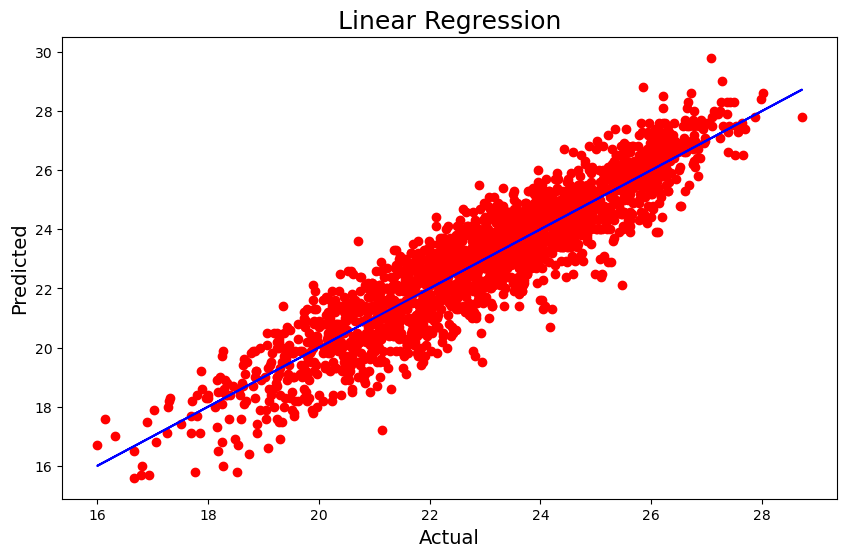

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_lr, y=y_test, color='r')
plt.plot(pred_lr, pred_lr, color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title("Linear Regression", fontsize=18)
plt.show()

In [90]:
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
pred_rf= rf.predict(x_test)
pred_train= rf.predict(x_train)
print('R2_score', r2_score(y_test, pred_rf))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_rf))
print('Mean Squared Error', mean_squared_error(y_test, pred_rf))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_rf)))

R2_score 0.9087557462144736
R2_score on training 98.50551853161053
Mean Absolute Error 0.560942263933142
Mean Squared Error 0.5295999753882769
Root mean Squared Error 0.7277361990366268


In [91]:
knn= KNN()
knn.fit(x_train, y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score', r2_score(y_test, pred_knn))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error', mean_squared_error(y_test, pred_knn))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score 0.8631179512674435
R2_score on training 90.48104684522576
Mean Absolute Error 0.6772173377692897
Mean Squared Error 0.7944909036163114
Root mean Squared Error 0.8913421922114488


In [92]:
dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_dt= dt.predict(x_test)
pred_train= dt.predict(x_train)
print('R2_score', r2_score(y_test, pred_dt))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_dt))
print('Mean Squared Error', mean_squared_error(y_test, pred_dt))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_dt)))

R2_score 0.7853235077179018
R2_score on training 100.0
Mean Absolute Error 0.8311121893383763
Mean Squared Error 1.2460254789992633
Root mean Squared Error 1.1162551137617527


In [93]:
gb= GradientBoostingRegressor()
gb.fit(x_train, y_train)
pred_gb= gb.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_gb))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_gb))
print('Mean Squared Error', mean_squared_error(y_test, pred_gb))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_gb)))

R2_score 0.8991271360404616
R2_score on training 90.37754927477746
Mean Absolute Error 0.6052479020219086
Mean Squared Error 0.5854863627455157
Root mean Squared Error 0.7651708062553848


In [94]:
er= ExtraTreeRegressor()
er.fit(x_train, y_train)
pred_er= er.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_er))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_er))
print('Mean Squared Error', mean_squared_error(y_test, pred_er))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_er)))

R2_score 0.7562627097178085
R2_score on training 90.37754927477746
Mean Absolute Error 0.8752725469677987
Mean Squared Error 1.4147001874558571
Root mean Squared Error 1.1894116980490217


In [95]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train, y_train)
pred_svr=svr.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_svr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error', mean_squared_error(y_test, pred_svr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_svr)))


R2_score 0.9117959217524088
R2_score on training 90.37754927477746
Mean Absolute Error 0.5495037598751062
Mean Squared Error 0.511954185946555
Root mean Squared Error 0.7155097385406819


In [96]:
rr= Ridge()
rr.fit(x_train, y_train)
pred_rr=rr.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_rr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_rr))
print('Mean Squared Error', mean_squared_error(y_test, pred_rr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_rr)))

R2_score 0.8490156541878071
R2_score on training 90.37754927477746
Mean Absolute Error 0.746791913443316
Mean Squared Error 0.8763434683142355
Root mean Squared Error 0.9361321852784656


# Cross validation

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
score= cross_val_score(knn,x,y, cv=5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_knn)-score.mean()))

[0.55735018 0.52821685 0.68502648 0.71801111 0.76795759]
0.6513124426020397
Difference between R2 score and cross validation score is  0.21180550866540382


In [99]:
score1= cross_val_score(lr,x,y, cv=5, scoring = 'r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_lr)-score.mean()))

[0.74260534 0.68165891 0.80003365 0.85676324 0.85906551]
0.7880253314634202
Difference between R2 score and cross validation score is  0.19770522439439342


In [100]:
score2= cross_val_score(rf,x,y, cv=5, scoring = 'r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_rf)-score.mean()))

[0.72628752 0.70287893 0.81243766 0.84780595 0.85083878]
0.7880497688768664
Difference between R2 score and cross validation score is  0.25744330361243395


In [101]:
score3= cross_val_score(dt,x,y, cv=5, scoring = 'r2')
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_dt)-score.mean()))

[0.48696774 0.43598328 0.64633994 0.72517206 0.66502566]
0.5918977343892078
Difference between R2 score and cross validation score is  0.13401106511586214


In [102]:
score4= cross_val_score(gb,x,y, cv=5, scoring = 'r2')
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_gb)-score.mean()))

[0.73819086 0.69499457 0.82084088 0.85973594 0.87082951]
0.7969183519684353
Difference between R2 score and cross validation score is  0.24781469343842188


In [103]:
score5= cross_val_score(er,x,y, cv=5, scoring = 'r2')
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_er)-score.mean()))

[0.47640815 0.46900556 0.64782267 0.68111478 0.66916037]
0.5887023043774169
Difference between R2 score and cross validation score is  0.10495026711576882


In [104]:
score6= cross_val_score(svr,x,y, cv=5, scoring = 'r2')
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_svr)-score.mean()))

[0.68931711 0.66267916 0.78904871 0.80403185 0.83736276]
0.7564879155192621
Difference between R2 score and cross validation score is  0.26048347915036907


In [105]:
score7= cross_val_score(rr,x,y, cv=5, scoring = 'r2')
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_rr)-score.mean()))

[0.74263869 0.68171482 0.80000847 0.85679208 0.85906912]
0.7880446341402664
Difference between R2 score and cross validation score is  0.19770321158576742
